<a href="https://colab.research.google.com/github/EmilGligore/Time-Series-Analysis-Predictions-with-ARIMA/blob/main/Time_Series_Analysis_%26_Predictions_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mean/Median/STD

In [ ]:
import numpy as np
import pandas as pd
data=np.random.rand(100,4)
df=pd.DataFrame(data, columns=['A', 'B', 'C', 'D'])
mean_values = df.mean()
median_values = df.median()
std_deviation = df.std()
print("Mean values:/n", mean_values)
print("/nMedian values:/n", median_values)
print("/nStandard Deviations:/n", std_deviation)

Mean values:/n A    0.485826
B    0.412773
C    0.494272
D    0.506316
dtype: float64
/nMedian values:/n A    0.500606
B    0.318758
C    0.434443
D    0.464123
dtype: float64
/nStandard Deviations:/n A    0.291297
B    0.308515
C    0.272736
D    0.305830
dtype: float64


#Iris Dataset

In [ ]:
import sklearn
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
rows = df.shape[0]
cols = df.shape[1]
print(f"{rows=}")
print(f"{cols=}")

rows=150
cols=5


In [ ]:
result = df.dtypes
print(f"{result=}")

result=sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


Text(0, 0.5, 'Count')

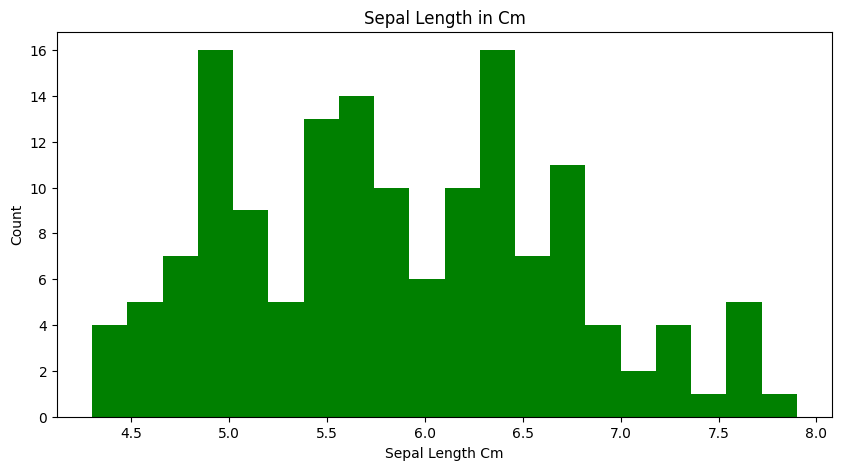

In [ ]:
plt.figure(figsize=(10,5))
x =df['sepal length (cm)']
plt.hist(x, bins=20, color="green")
plt.title("Sepal Length in Cm")
plt.xlabel("Sepal Length Cm")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

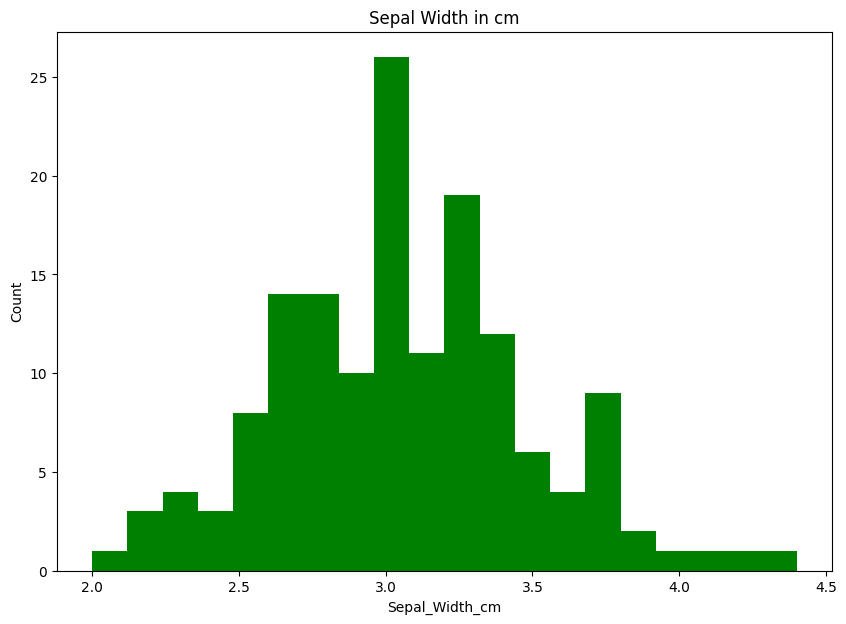

In [ ]:
plt.figure(figsize = (10, 7))
x = df["sepal width (cm)"]

plt.hist(x, bins = 20, color = "green")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

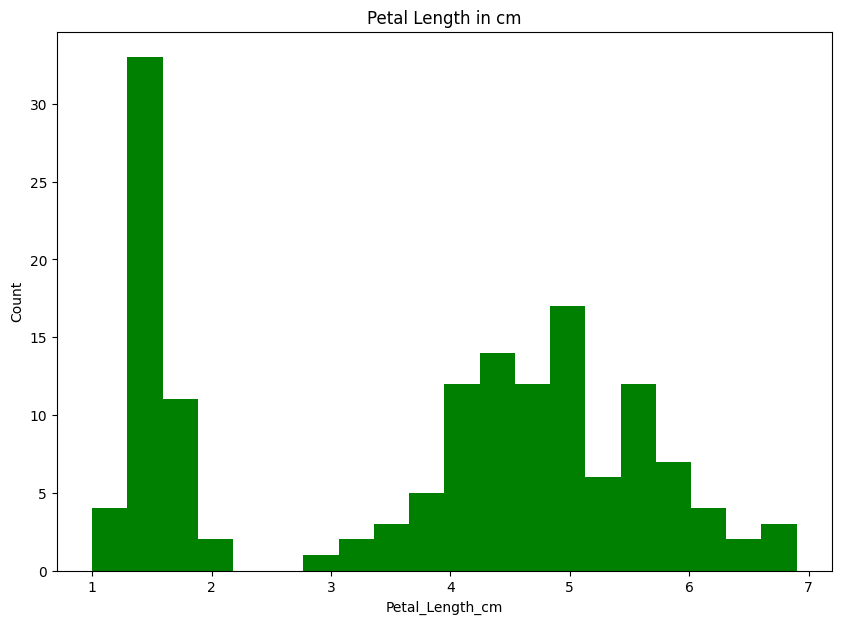

In [ ]:
plt.show()

plt.figure(figsize = (10, 7))
x = df["petal length (cm)"]

plt.hist(x, bins = 20, color = "green")
plt.title("Petal Length in cm")
plt.xlabel("Petal_Length_cm")
plt.ylabel("Count")


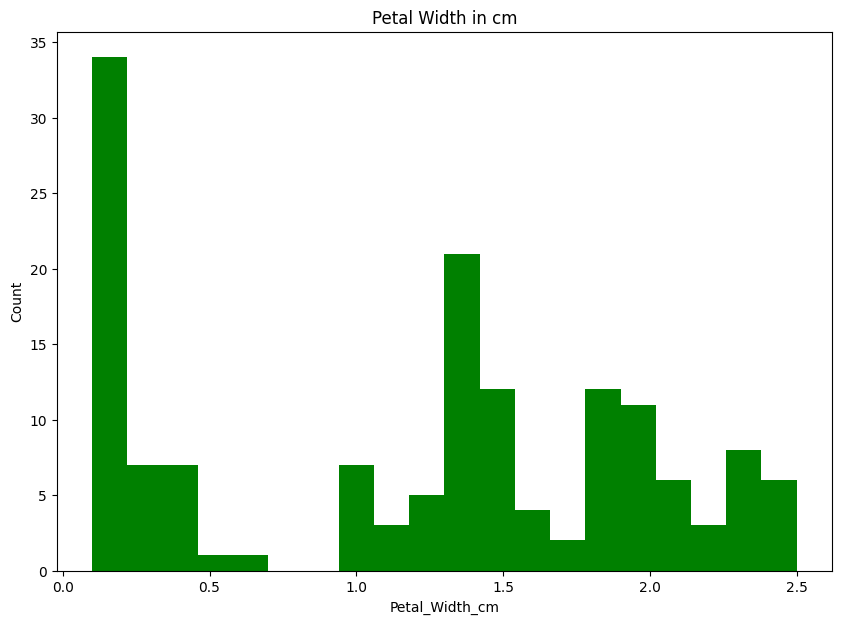

In [ ]:

plt.figure(figsize = (10, 7))
x = df["petal width (cm)"]

plt.hist(x, bins = 20, color = "green")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")

plt.show()

<Axes: >

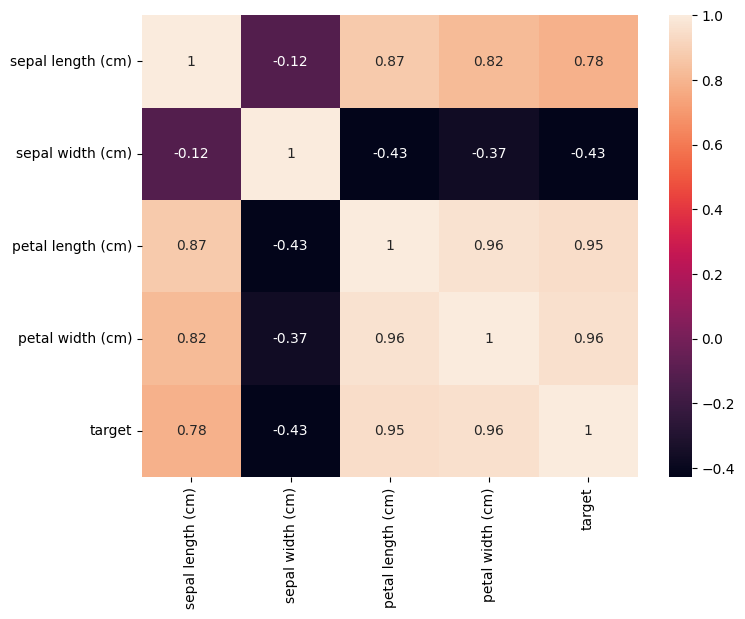

In [ ]:
plt.figure(figsize=(8,6))
iris_corr = df.corr()
sns.heatmap(iris_corr, annot=True)
"""
From the plot, we see that the petal length and petal width are highly correlated, as well as the Petal width and sepal length have a good correlation.
"""

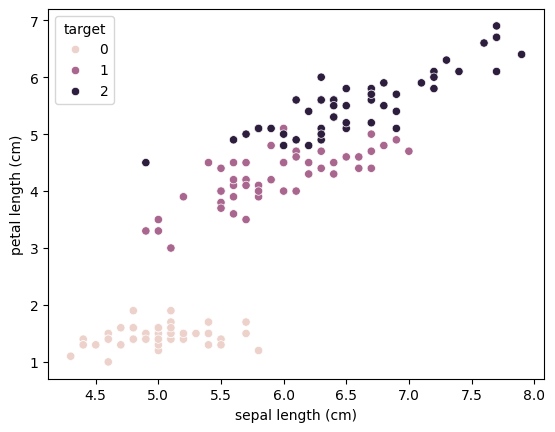

In [ ]:
le = sklearn.preprocessing.LabelEncoder()

df.target = le.fit_transform(df.target)

sns.scatterplot(data=df, x='sepal length (cm)',
                y='petal length (cm)', hue='target')
plt.plot()
plt.show()

In [ ]:
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  sepal_area  
0       0       17.85  
1       0       14.70  
2       0       15.04  
3       0       14.26  
4       0       18.00  


<Axes: title={'center': 'Comparison on various species based on Petal length and width'}, xlabel='petal length (cm)', ylabel='petal width (cm)'>

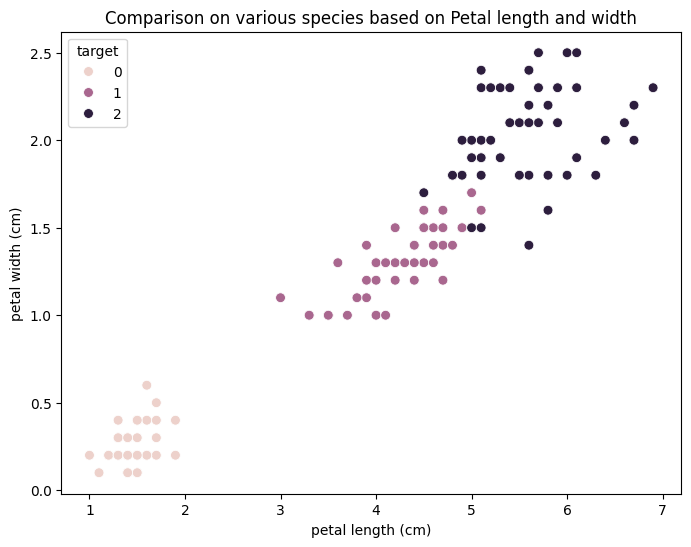

In [ ]:
plt.figure(figsize=(8,6))

plt.title('Comparison on various species based on Petal length and width')

sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['target'], s=50)
#Iris-versicolor species have average petal length and petal width.

In [ ]:
def cap_outliers(df, column, upper_limit):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else x)
    return df

column = 'petal width (cm)'

upper_limit = df[column].quantile(0.95)

capped_iris_df = cap_outliers(df, column, upper_limit)

capped_iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.193333,1.000000,17.822867
std,0.828066,0.435866,1.765298,0.752773,0.819232,3.361854
min,4.300000,2.000000,1.000000,0.100000,0.000000,10.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,15.660000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,17.660000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,20.325000
max,7.900000,4.400000,6.900000,2.300000,2.000000,30.020000


#Time Series

#1 . Write Python code to load the California Housing dataset from scikit-learn. Then, simulate time series data by adding a 'date' column, where the date ranges from January 1, 1980, and increments by one day for each sample in the dataset.
Hint: Use sklearn.datasets.fetch_california_housing and pandas.date_range.


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# 1. Load the dataset and create date column
data = fetch_california_housing(as_frame=True)
df = data.frame
df['Date'] = pd.date_range(start='1/1/1980', periods=len(df), freq='D')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Date
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1980-01-01
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1980-01-02
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1980-01-03
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1980-01-04
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1980-01-05


#2 . Create a time series plot showing the median house value over time.


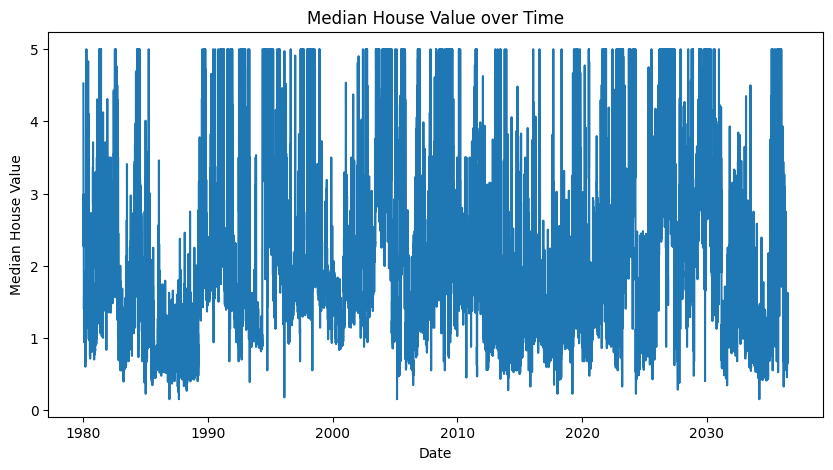

In [ ]:
# 2. Plot median house value over time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['MedHouseVal'])
plt.title('Median House Value over Time')
plt.xlabel('Date')
plt.ylabel('Median House Value')
plt.show()

#3. Resample the data to a monthly frequency and calculate the mean median house value for each month. Show the first 5 rows of the resampled data.


In [ ]:
# 3. Resample and calculate mean median house value for each month
monthly_resampled = df.set_index('Date').resample('M')['MedHouseVal'].mean()
print(monthly_resampled.head())

Date
1980-01-31    2.040387
1980-02-29    1.249655
1980-03-31    1.212065
1980-04-30    2.397900
1980-05-31    3.243935
Freq: M, Name: MedHouseVal, dtype: float64


#4. Perform a basic time series decomposition on the median house value to respec identify its trend and seasonal components. Hint: Use statsmodels.tsa.seasonal.seasonal_decomposese


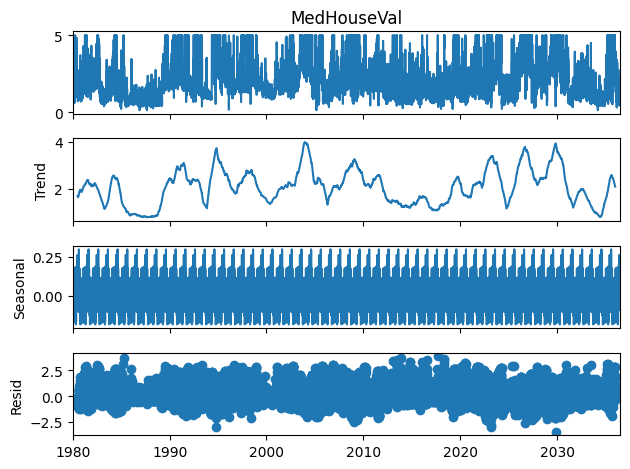

In [ ]:
# 4. Time series decomposition
decomposition = seasonal_decompose(df.set_index('Date')['MedHouseVal'], model='additive', period=365)
decomposition.plot()
plt.show()

#5. Compute a rolling window average of 30 days for the median house window are value. Plot the original values and the rolling average on the same plot.


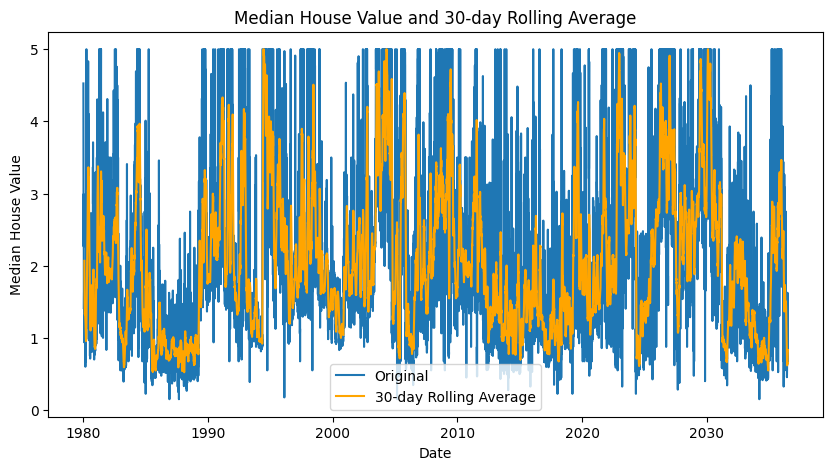

In [ ]:
# 5. Corrected Rolling window average
df['rolling_avg'] = df['MedHouseVal'].rolling(window=30).mean()
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['MedHouseVal'], label='Original')
plt.plot(df['Date'], df['rolling_avg'], label='30-day Rolling Average', color='orange')
plt.title('Median House Value and 30-day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Median House Value')
plt.legend()
plt.show()


#6. Build a simple time series forecasting model (like ARIMA) to predict the median house value. Split the data into training and testing sets, train the model on ta into tr the training set, and evaluate its performance on the test set. Hint: Use statsmodels.tsa.arima.model.ARIMA.


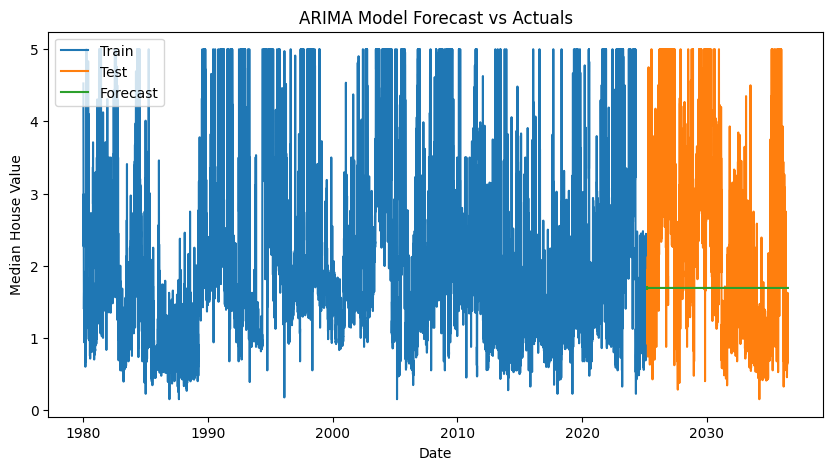

In [ ]:
# 6. ARIMA model for time series forecasting
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]
model = ARIMA(train['MedHouseVal'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(10, 5))
plt.plot(train['Date'], train['MedHouseVal'], label='Train')
plt.plot(test['Date'], test['MedHouseVal'], label='Test')
plt.plot(test['Date'], forecast, label='Forecast')
plt.title('ARIMA Model Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

#7. Check if the median house value time series data is stationary. If not, apply a differencing method to make it stationary. Hint: Use statsmodels.tsa.stattools.adfuller for stationarity testing and diff() for differencing.

In [ ]:
# 7. Check stationarity and apply differencing if necessary
result = adfuller(df['MedHouseVal'])
if result[1] > 0.05:
    print('Series is not stationary. Differencing needed.')
    df['diff'] = df['MedHouseVal'].diff()
    result_diff = adfuller(df['diff'].dropna())
    print('ADF Statistic after differencing: %f' % result_diff[0])
    print('p-value after differencing: %f' % result_diff[1])
else:
    print('Series is stationary. No differencing needed.')

Series is stationary. No differencing needed.
